# Variational Method in Quantum Mechanics

## Motivation

The variational method is a powerful method that can be used to determine upper bounds and approximations for ground state energies of numerous quantum mechanical problems.  The variational method is used heavily in electronic structure theories such as Hartree Fock.

## Learning Goals:

After working through these notes, you will be able to:

1. Describe the theoretical basis for the variational method in quantum mechanics
2. Write out the general matrix equation of the variational method for linear variational parameters
3. Solve the particle in a 1D box using the variational method and a prescribed basis

## Coding Concepts

The following coding concepts are used in this notebook:

1. [Variables](../../coding_concepts/variables.ipynb)
2. [Functions](../../coding_concepts/functions.ipynb)
3. [Plotting with matplotlib](../../coding_concepts/plotting_with_matplotlib.ipynb)

## Definition and Derivation of the Variational Method

The variational principle applied to the Schrodinger equation results in that if

$\hat{H}\psi_0 = E_0\psi_0$

is the Schrodinger equation for the Hamiltonian of interest then 

$E_\phi = \frac{\langle\phi|\hat{H}|\phi\rangle}{\langle\phi|\phi\rangle} > E_0$

for any function $\phi\neq\psi_0$.


*Proof:* 

We can express $\phi$ as a linear combination of $\psi_n$s because $\psi_n$s span the space of interest

$\phi = \sum_n c_n \psi_n$.

This allows us to write

$E_\phi = \frac{\langle\phi|\hat{H}|\phi\rangle}{\langle\phi|\phi\rangle}$

$ = \frac{\langle\sum_n c_n \psi_n|\hat{H}|\sum_n c_n \psi_n\rangle}{\langle\sum_n c_n \psi_n|\sum_n c_n \psi_n \rangle} $

$= \frac{\sum_n c_n^*c_n\langle \psi_n|\hat{H}| \psi_n\rangle}{\sum_n c_n ^*c_n\langle\psi_n| \psi_n \rangle} $

$ = \frac{\sum_n c_n^*c_nE_n}{\sum_n c_n ^*c_n} $.

Subtract $E_0$ from both sides to get

$E_\phi - E_0 = \frac{\sum_n c_n^*c_nE_n}{\sum_n c_n ^*c_n} - E_0$.

multiply $E_0$ on the right by $\frac{\sum_n c_n ^*c_n}{\sum_n c_n ^*c_n}$ to combine terms

$E_\phi - E_0 = \frac{\sum_n c_n^*c_n(E_n-E_0)}{\sum_n c_n ^*c_n}$.

We note that, on the right-hand side, $E_n-E_0\geq0$ and $c_n^*c_n\geq0$ so 

$E_\phi - E_0 \geq 0$

or 

$E_\phi \geq E_0$

where equality only holds for $\phi = \psi_0$.

## The Varitiational Method In practice

How does this help us in practice?  In a typical QM problem, we are attempting to solve for the wavefunction(s) and energy(ies) for a given Hamiltonian.  If the Hamiltonian is such that solving the problem exactly is too challenging (e.g. any two or more electron problem) we can expand the wavefunction in a basis and attempt to solve the problem that way.  We start with 

$\psi \approx \phi = \sum_n^N c_nf_n$.

Truncating this expansion at any finite $n$ leads to an approximate solution.  Also, what the variational principle tells us is that we can minimize the energy with respect to variational paramters ${c_n}$ and still have $E_\phi \geq E_0$.  

We will illustrate this idea and the general matrix construction with a simple example of two basis functions ($N=2$)

$\phi = c_1f_1 + c_2f_2$.

There is currently no need to define these functions explicitly so we will leave them as generic functions $f_1$ and $f_2$.  We now solve for the energy

$E_\phi = \frac{\langle\phi|\hat{H}|\phi\rangle}{\langle\phi|\phi\rangle}$

$ = \frac{\langle c_1f_1 + c_2f_2|\hat{H}|c_1f_1 + c_2f_2 \rangle}{\langle c_1f_1 + c_2f_2|c_1f_1 + c_2f_2 \rangle}$.

Let's investigate the numerator and denomenator separately.  We start with the numerator

$\langle c_1f_1 + c_2f_2|\hat{H}|c_1f_1 + c_2f_2 \rangle = \langle c_1f_1|\hat{H}|c_1f_1\rangle + \langle c_1f_1|\hat{H}|c_2f_2\rangle +\langle c_2f_2|\hat{H}|c_1f_1\rangle + \langle c_2f_2|\hat{H}|c_2f_2\rangle$

$ = c_1^*c_1\langle f_1|\hat{H}|f_1\rangle + c_1^*c_2\langle f_1|\hat{H}|f_2\rangle +c_2^*c_1\langle f_2|\hat{H}|f_1\rangle + c_2^*c_2\langle f_2|\hat{H}|f_2\rangle$.

We note that $c_i$s are real and thus $c_1^*c_1=c_1^2$ and $c_1c_2=c_2c_1$ thus

$Numerator = c_1^2 \langle f_1|\hat{H}|f_1\rangle + c_1c_2\langle f_1|\hat{H}|f_2\rangle +c_2c_1\langle f_2|\hat{H}|f_1\rangle + c_2^2\langle f_2|\hat{H}|f_2\rangle$.

Finally we recognize that since $\hat{H}$ is Hermitian, we have $\langle f_2|\hat{H}|f_1\rangle = \langle f_1|\hat{H}|f_2\rangle$ yielding 

$Numerator = c_1^2 \langle f_1|\hat{H}|f_1\rangle + 2c_1c_2\langle f_1|\hat{H}|f_2\rangle + c_2^2\langle f_2|\hat{H}|f_2\rangle$.

We will refer to the integrals above as *matrix elements* with, generically, $H_{ij} = \langle f_i|\hat{H}|f_j\rangle$.

We now consider the denominator of the energy equation above and we utilize similar algebra for the numerator to get

$\langle c_1f_1 + c_2f_2|c_1f_1 + c_2f_2 \rangle = c_1^2S_{11} + 2c_1c_2S_{12} + c_2^2S_{22}$

where 

$S_{ij} = \langle f_i|f_j\rangle$

is another matrix element but this time referred to as the basis function overlap.

Now we have that the energy of the trial wavefunction is

$E_\phi = \frac{c_1^2 H_{11} + 2c_1c_2H_{12} + c_2^2H_{22}}{c_1^2S_{11} + 2c_1c_2S_{12} + c_2^2S_{22}}$.



Since $E_\phi \geq E_0$ for any function $\phi$ we can minimize the energy, $E_\phi$, with respect to variational paramters $c_1$ and $c_2$.  We start by minimizing with respect to $c_1$ which equates to differentiating the energy with respect to $c_1$ and setting that derivative to zero

$\frac{\partial E_\phi}{\partial c_1} = 0 = c_1(H_{11}-ES_{11}) + c_2(H_{12}-ES_{12})$.

Similarly, minimizing with respect to $c_2$ we get

$\frac{\partial E_\phi}{\partial c_2} = 0 = c_1(H_{12}-ES_{12}) + c_2(H_{22}-ES_{22})$.

We can rewrite the above two coupled linear equations as a matrix equation

$\begin{bmatrix} H_{11}-ES_{11} & H_{12}-ES_{12} \\ H_{12}-ES_{12} & H_{22}-ES_{22} \end{bmatrix}\begin{bmatrix} c_1 \\ c_2 \end{bmatrix} = 0$.

We can rewrite the left most matrix as a difference of two matrices and then add to both sides:

$ \left(\begin{bmatrix} H_{11} & H_{12} \\ H_{12} & H_{22} \end{bmatrix} - \begin{bmatrix} ES_{11} & ES_{12} \\ ES_{12} & ES_{22} \end{bmatrix} \right) \begin{bmatrix} c_1 \\ c_2 \end{bmatrix} = 0$

$ \Rightarrow \begin{bmatrix} H_{11} & H_{12} \\ H_{12} & H_{22} \end{bmatrix} \begin{bmatrix} c_1 \\ c_2 \end{bmatrix} = \begin{bmatrix} ES_{11} & ES_{12} \\ ES_{12} & ES_{22} \end{bmatrix} \begin{bmatrix} c_1 \\ c_2 \end{bmatrix} $

$ \begin{bmatrix} H_{11} & H_{12} \\ H_{12} & H_{22} \end{bmatrix} \begin{bmatrix} c_1 \\ c_2 \end{bmatrix} = E\begin{bmatrix} S_{11} & S_{12} \\ S_{12} & S_{22} \end{bmatrix} \begin{bmatrix} c_1 \\ c_2 \end{bmatrix} $

or, written in more general matrix notation, 

$ \mathbf{H}\mathbf{c} = E\mathbf{S}\mathbf{c}$.

If we now left multiply both sides of the above equation by $\mathbf{S}^{-1}$ we see that we have an eigenvalue-eigenvector problem

$\mathbf{S}^{-1}\mathbf{H}\mathbf{c} = E\mathbf{I}\mathbf{c}$.

Thus the minimum energies are the eigenvalues of $\mathbf{S}^{-1}\mathbf{H}$ and the variational parameters that minimize the energies are the eigenvectors of $\mathbf{S}^{-1}\mathbf{H}$.

## Example: Particle in a Box

Let's consider a free particle in 1D bounded to $0\leq x\leq a$.  The Hamiltonian for such a system is simply the kinetic energy operator

$\hat{H} = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2}$.

While we can (/have) solved this problem analytically, it will be instructive to see how the variational solution works.  We start by approximating $\psi(x)$ as an expansion in two basis functions

$\psi(x) \approx c_1x(a-x) + c_2x^2(a-x)^2$.

where the basis functions are $f_1(x) = x(a-x)$ and $f_2(x) = x^2(a-x)^2$ and $c_1$ and $c_2$ are the variational parameters (/linear coefficients of basis functions).  In order to solve for the variational energies and wavefunctions given this expansion we must construct the Hamiltonian matrix, $\mathbf{H}$, and the basis function overlap matrix, $\mathbf{S}$.  We will then compute and diagonlize the $\mathbf{S}^{-1}\mathbf{H}$ matrix.  Recall,

$ H_{ij} = \langle f_i|\hat{H}|f_j\rangle$

and

$ S_{ij} = \langle f_i|f_j\rangle $.

In this problem, we have two basis functions

$f_1(x) = x(a-x)$

and 

$f_2(x) = x^2(a-x)^2$.

We can now compute the matrix elements:

$H_{11} = \langle x(a-x)|\hat{H}|x(a-x)\rangle$

$ = \langle ax|\hat{H}|ax\rangle -\langle ax|\hat{H}|x^2\rangle - \langle x^2|\hat{H}|ax\rangle + \langle x^2|\hat{H}|x^2\rangle$

$ = -a\langle x|\hat{H}|x^2\rangle + \langle x^2|\hat{H}|x^2\rangle $

where the last equality holds because the second derivative of $x$ with respect to x is zero. Let's now investigate each of these integrals

$ \langle x|\hat{H}|x^2\rangle = \int_0^ax \frac{-\hbar^2}{2m}\frac{d^2}{dx^2} x^2dx \\ = \frac{-\hbar^2}{m}\int_0^axdx = \frac{-\hbar^2a^2}{2m} $

Similarly we should get

$ \langle x^2|\hat{H}|x^2\rangle =\frac{-\hbar^2a^3}{3m} $.

Thus

$H_{11} = -a\frac{-\hbar^2a^2}{2m} + \frac{-\hbar^2a^3}{3m} = \frac{\hbar^2a^3}{6m}$

$H_{22} = \langle x^2(a-x)^2|\hat{H}|x^2(a-x)^2\rangle$

$ = \langle a^2x^2|\hat{H}|a^2x^2\rangle -2\langle a^2x^2|\hat{H}|2ax^3\rangle + \langle a^2x^2|\hat{H}|x^4\rangle -2\langle ax^3|\hat{H}|a^2x^2\rangle + 4\langle ax^3|\hat{H}|ax^3\rangle -2\langle ax^3|\hat{H}|x^4\rangle + \langle x^4|\hat{H}|a^2x^2\rangle - 2\langle x^4|\hat{H}|ax^3\rangle + \langle x^4|\hat{H}|x^4\rangle$

$ = \frac{-\hbar^2a^7}{3m} +\frac{3\hbar^2 a^7}{m} - \frac{6\hbar^2 a^7}{5m} +\frac{\hbar^2 a^7}{2m} - \frac{12\hbar^2 a^7}{5m} +\frac{2\hbar^2 a^7}{m} - \frac{\hbar^2 a^7}{5m} + \frac{\hbar^2 a^7}{m} - \frac{6\hbar^2 a^7}{7m}$

$ = \frac{\hbar^2a^7}{105m} $

$H_{12} = H_{21} = \frac{\hbar^2a^5}{30m}$

We can now complete the Hamiltonian matrix, $\mathbf{H}$,

$\mathbf{H} = \frac{\hbar^2a^3}{m} \begin{bmatrix} \frac{1}{6} & \frac{a^2}{30}\\ \frac{a^2}{30} & \frac{a^4}{105} \end{bmatrix} $

It can also be shown that $\mathbf{S}$ is

$\mathbf{S} = \frac{a^5}{10} \begin{bmatrix} \frac{1}{3} & \frac{a^2}{14}\\ \frac{a^2}{14} & \frac{a^4}{63} \end{bmatrix} $

In [1]:
# to code this up we are going to set a=1
import numpy as np
a = 1.0
hbar = 1.0
m = 1.0

S = np.matrix([[1.0/30.0, 1.0/140.0],[1.0/140.0,1.0/630.0]])
H = np.matrix([[1.0/6.0,1.0/30.0],[1.0/30.0,1.0/105.0]])

e,v = np.linalg.eig(np.dot(np.linalg.inv(S),H))

print("Eigenvalues:", e)
print("First eigenvector:", v[:,0])

Eigenvalues: [ 4.93487481 51.06512519]
First eigenvector: [[-0.66168489]
 [-0.74978204]]


In [2]:
print("S^{-1} = ", np.linalg.inv(S))
print("S^{-1}H = ", np.dot(np.linalg.inv(S),H))

S^{-1} =  [[  840. -3780.]
 [-3780. 17640.]]
S^{-1}H =  [[ 14.  -8.]
 [-42.  42.]]


In [3]:
np.roots([1,-56,14*42-42*8])

array([51.06512519,  4.93487481])

So we see that the smallest energy in this basis is 

$E_\phi = 4.9349 \frac{\hbar^2}{m}$.

How does this compare to the analytic solution?  We need to recall that for particle in a box we have:

$E_n = \frac{n^2\pi^2\hbar^2}{2ma^2} $.

Plugging in for the ground state, $n=1$, and $a=1$ since that is what we used numerically above we get

$E_1 = \frac{\pi^2\hbar^2}{2} \approx 4.9348 \frac{\hbar^2}{m} $.

So we can see that our variational solution worked out well for the energy.  Now how about the wavefunction?

In [4]:
print(np.pi**2/2)

4.934802200544679


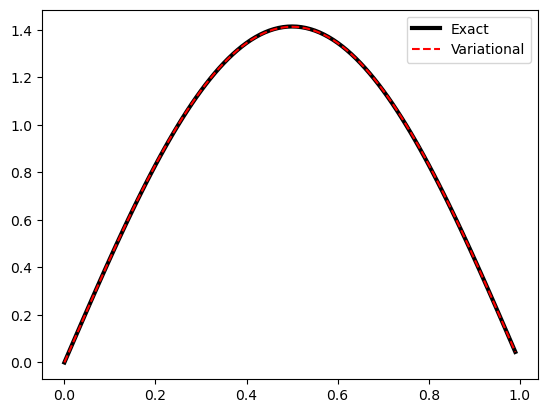

In [5]:
# plot wavefunction
import matplotlib.pyplot as plt
from scipy import integrate
%matplotlib inline
# x values
x = np.arange(0,1,0.01)
# exact wavefunction
psi1Exact = np.sqrt(2)*np.sin(np.pi*x) 
plt.plot(x,psi1Exact,'k-',label="Exact",lw=3)
# variational basis function wavefunction
psi1Var = v[0,0]*x*(1-x) + v[1,0]*x**2*(1-x)**2
norm = np.sqrt(integrate.simpson(np.power(psi1Var,2),x=x))
plt.plot(x,-psi1Var/norm,'r--', label="Variational")
plt.legend()
plt.show();

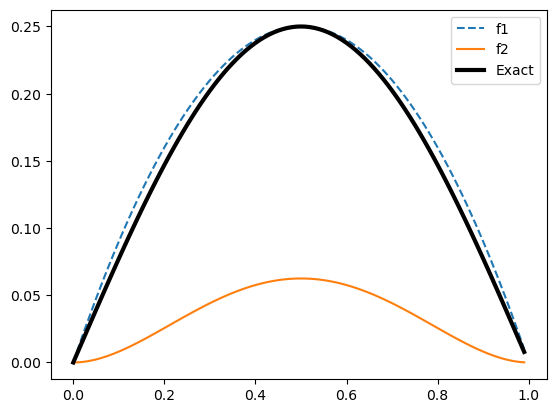

In [6]:
x = np.arange(0,1,0.01)
# variational basis function wavefunction
f1 = x*(1-x) 
f2 = x**2*(1-x)**2
plt.plot(x,f1,'--', label="f1")
plt.plot(x,f2,'-', label="f2")
# exact wavefunction
psi1Exact = 0.25*np.sin(np.pi*x) 
plt.plot(x,psi1Exact,'k-',label="Exact",lw=3)
plt.legend()
plt.show();

### PIB with 3 basis functions

In [7]:
import numpy as np
def f11(x):
    return x**2*(1-x)**2
def f12(x): 
    return x**3*(1-x)**3
def f13(x):
    return x**4*(1-x)**4
def f23(x):
    return x**5*(1-x)**5
def f22(x):
    return x**4*(1-x)**4
def f33(x):
    return x**6*(1-x)**6
from scipy.integrate import quad
S11 = quad(f11,0,1)[0]
S12 = quad(f12,0,1)[0]
S13 = quad(f13,0,1)[0]
S22 = quad(f22,0,1)[0]
S23 = quad(f23,0,1)[0]
S33 = quad(f33,0,1)[0]
S = np.matrix([[S11, S12, S13],[S12,S22,S23], [S13,S23,S33]])
print(S)

[[3.33333333e-02 7.14285714e-03 1.58730159e-03]
 [7.14285714e-03 1.58730159e-03 3.60750361e-04]
 [1.58730159e-03 3.60750361e-04 8.32500833e-05]]


In [8]:
import numpy as np
def h11(x):
    return x*(1-x) 
def h12(x): 
    return x*(1-x) * (-6*x**2+6*x-1)
def h21(x): 
    return x**2*(1-x)**2
def h13(x):
    return x*(1-x) * (15*x**4-30*x**3+18*x**2-3*x)
def h23(x):
    return x**2*(1-x)**2 * (15*x**4-30*x**3+18*x**2-3*x)
def h22(x):
    return x**2*(1-x)**2 * (-6*x**2+6*x-1)
def h33(x):
    return x**3*(1-x)**3 * (15*x**4-30*x**3+18*x**2-3*x)
from scipy.integrate import quad
H11 = quad(h11,0,1)[0]
H12 = quad(h12,0,1)[0]
H13 = quad(h13,0,1)[0]
H22 = quad(h22,0,1)[0]
H23 = quad(h23,0,1)[0]
H33 = quad(h33,0,1)[0]
H = np.matrix([[H11, H12, H13],[H12,H22,H23], [H13,H23,H33]])
print(H)

[[0.16666667 0.03333333 0.00714286]
 [0.03333333 0.00952381 0.00238095]
 [0.00714286 0.00238095 0.00064935]]


In [9]:
e,v = np.linalg.eig(np.dot(np.linalg.inv(S),H))

print("Eigenvalues:", e)
print("eigenvector corresponding to lowest E:", v[:,np.argmin(e)])

Eigenvalues: [175.47838596   4.93480222  44.58681182]
eigenvector corresponding to lowest E: [[0.68354516]
 [0.68050884]
 [0.26395781]]
